### What defines a successful society?
* What social condition defines a successful society?
* What are some economic outcomes(measures) that defines a successful society?

### How Do You Measure Conditions and Outcomes?

#### Outcomes
One very popular way to assess the economic health of a country is through its gross domestic product (GDP). This number is important because the higher the GDP - meaning, the more production that’s happening - the more access to capital, employment opportunities, and variety of available consumption choices your citizens will enjoy.

#### Measuring the underlying economic conditions
What are the conditions that lie behind the widest possible enjoyment economic success?
* Index of Economic Freedom: This includs labor, business, spending, and trade along with measures like govt integrity and respect for proerty rights 


## Getting the Data
We’ll want our data broken down to the per capita level because that’s the best way to get useful apples-to-apples comparisons between countries of different sizes.

I got my GDP data from the World Bank site, on this page. My Index of Economic Freedom data I took from here.

In [184]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt

gdp = pd.read_csv("../data/exported_gdp.csv")
economic_index = pd.read_csv("../data/heritage_all_data.csv")


Running gdp shows us that the GDP data set has got 248 rows that include plenty of stuff we don’t want; like some null values (NaN) and at least a few rows at the end with general values that will get in the way of our focus on countries. We’ll need to clean all that up, but our code will simply ignore those general values, because there will be no corresponding rows in the ec_index dataframe.

In [185]:
gdp

,Country,Most Recent Year,Most Recent Value,Unnamed: 3
0,Afghanistan,2020.0,"2,087.6",NaN
1,Albania,2020.0,"13,817.8",NaN
2,Algeria,2020.0,"11,268.3",NaN
3,American Samoa,NaN,NaN,NaN
4,Andorra,NaN,NaN,NaN
...,...,...,...,...
243,Low & middle income,2020.0,"10,849.3",NaN
244,Low income,2020.0,"2,523.8",NaN
245,Lower middle income,2020.0,"7,092.0",NaN
246,Middle income,2020.0,"11,815.9",NaN


In [186]:
gdp.drop("Unnamed: 3", axis=1, inplace=True)
gdp.head()

,Country,Most Recent Year,Most Recent Value
0,Afghanistan,2020.0,"2,087.6"
1,Albania,2020.0,"13,817.8"
2,Algeria,2020.0,"11,268.3"
3,American Samoa,NaN,NaN
4,Andorra,NaN,NaN


In [187]:
gdp.columns = ["Country", "Year", "Value"]

In [188]:
gdp.dtypes

Country     object
Year       float64
Value       object
dtype: object

In [189]:
gdp

,Country,Year,Value
0,Afghanistan,2020.0,"2,087.6"
1,Albania,2020.0,"13,817.8"
2,Algeria,2020.0,"11,268.3"
3,American Samoa,NaN,NaN
4,Andorra,NaN,NaN
...,...,...,...
243,Low & middle income,2020.0,"10,849.3"
244,Low income,2020.0,"2,523.8"
245,Lower middle income,2020.0,"7,092.0"
246,Middle income,2020.0,"11,815.9"


dtypes shows us that the Year and Value columns are already formatted as float64, which is perfect for us.

In [190]:
gdp

,Country,Year,Value
0,Afghanistan,2020.0,"2,087.6"
1,Albania,2020.0,"13,817.8"
2,Algeria,2020.0,"11,268.3"
3,American Samoa,NaN,NaN
4,Andorra,NaN,NaN
...,...,...,...
243,Low & middle income,2020.0,"10,849.3"
244,Low income,2020.0,"2,523.8"
245,Lower middle income,2020.0,"7,092.0"
246,Middle income,2020.0,"11,815.9"


In [191]:
economic_index.head()

,Name,Index Year,Overall Score,Property Rights,Government Integrity,Judicial Effectiveness,Tax Burden,Government Spending,Fiscal Health,Business Freedom,Labor Freedom,Monetary Freedom,Trade Freedom,Investment Freedom,Financial Freedom
0,Afghanistan,2020,54.7,48.3,24.8,30.0,91.4,79.2,99.9,54.7,61.6,81.0,66.0,10.0,10.0
1,Albania,2020,66.9,57.1,38.8,33.0,85.9,74.6,86.3,65.7,52.1,81.2,88.4,70.0,70.0
2,Algeria,2020,46.9,37.9,28.3,35.0,75.4,52.6,17.3,63.0,50.5,76.2,66.2,30.0,30.0
3,Angola,2020,52.2,36.9,15.1,14.3,87.3,85.7,71.9,57.7,61.1,59.6,66.2,30.0,40.0
4,Argentina,2020,53.1,50.5,49.7,47.0,69.6,50.7,24.7,60.2,46.5,53.7,69.2,55.0,60.0


In [192]:
gdp.dtypes

Country     object
Year       float64
Value       object
dtype: object

We should also check the column data types used in our Index of Economic Freedom dataframe (that I called “score”). The only three columns we’ll be interested in here are Name (which holds country names) and Index Year (because there are multiple years of data included), and Overall Score.

In [193]:
economic_index

,Name,Index Year,Overall Score,Property Rights,Government Integrity,Judicial Effectiveness,Tax Burden,Government Spending,Fiscal Health,Business Freedom,Labor Freedom,Monetary Freedom,Trade Freedom,Investment Freedom,Financial Freedom
0,Afghanistan,2020,54.7,48.3,24.8,30.0,91.4,79.2,99.9,54.7,61.6,81.0,66.0,10.0,10.0
1,Albania,2020,66.9,57.1,38.8,33.0,85.9,74.6,86.3,65.7,52.1,81.2,88.4,70.0,70.0
2,Algeria,2020,46.9,37.9,28.3,35.0,75.4,52.6,17.3,63.0,50.5,76.2,66.2,30.0,30.0
3,Angola,2020,52.2,36.9,15.1,14.3,87.3,85.7,71.9,57.7,61.1,59.6,66.2,30.0,40.0
4,Argentina,2020,53.1,50.5,49.7,47.0,69.6,50.7,24.7,60.2,46.5,53.7,69.2,55.0,60.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,Venezuela,2020,25.2,10.1,14.6,12.6,72.8,66.3,0.0,30.8,27.7,0.0,58.0,0.0,10.0
182,Vietnam,2020,58.8,52.6,33.8,40.1,79.5,75.9,58.0,65.6,62.5,68.2,79.6,40.0,50.0
183,Yemen,2020,NaN,22.5,21.9,20.1,NaN,96.5,60.1,43.9,43.8,42.6,70.0,50.0,NaN
184,Zambia,2020,53.5,45.2,28.4,31.3,73.2,81.7,18.4,66.4,47.0,72.2,72.6,55.0,50.0


In [194]:
gdp

,Country,Year,Value
0,Afghanistan,2020.0,"2,087.6"
1,Albania,2020.0,"13,817.8"
2,Algeria,2020.0,"11,268.3"
3,American Samoa,NaN,NaN
4,Andorra,NaN,NaN
...,...,...,...
243,Low & middle income,2020.0,"10,849.3"
244,Low income,2020.0,"2,523.8"
245,Lower middle income,2020.0,"7,092.0"
246,Middle income,2020.0,"11,815.9"


In [195]:
# I'll select just the columns from both dataframes tht we'll need:
economic_index = economic_index[["Name", "Index Year", "Overall Score"]]
gdp = gdp[["Country", "Value"]]
economic_index

,Name,Index Year,Overall Score
0,Afghanistan,2020,54.7
1,Albania,2020,66.9
2,Algeria,2020,46.9
3,Angola,2020,52.2
4,Argentina,2020,53.1
...,...,...,...
181,Venezuela,2020,25.2
182,Vietnam,2020,58.8
183,Yemen,2020,NaN
184,Zambia,2020,53.5


In [196]:
# Rename the columns in the economic_index dataframe. The critical one 
# changing the Name to Country so it matches the cloumn name.
economic_index.columns = ["Country", "Year", "Score"]
economic_index.dtypes

Country     object
Year         int64
Score      float64
dtype: object

In [197]:
# Limit the data we take from economic_index to only those whoe Year
# column covers 2020

economic_index = economic_index[economic_index.Year.isin([2020])]
economic_index


,Country,Year,Score
0,Afghanistan,2020,54.7
1,Albania,2020,66.9
2,Algeria,2020,46.9
3,Angola,2020,52.2
4,Argentina,2020,53.1
...,...,...,...
181,Venezuela,2020,25.2
182,Vietnam,2020,58.8
183,Yemen,2020,NaN
184,Zambia,2020,53.5


In [198]:
# Contains unwanted data under "Country" that will be filterd out by merged
gdp

,Country,Value
0,Afghanistan,"2,087.6"
1,Albania,"13,817.8"
2,Algeria,"11,268.3"
3,American Samoa,NaN
4,Andorra,NaN
...,...,...
243,Low & middle income,"10,849.3"
244,Low income,"2,523.8"
245,Lower middle income,"7,092.0"
246,Middle income,"11,815.9"


Now I’ll merge the two dataframes, telling Pandas to use the values of Country to align the data. When that’s done, I’ll select only those columns that we still need: to exclude the Year column from ec_index and then remove rows with NaN values. That’ll be all the data cleaning we’ll need here.

In [199]:
merged_data = pd.merge(gdp, economic_index, on="Country")

In [200]:
merged_data

,Country,Value,Year,Score
0,Afghanistan,"2,087.6",2020,54.7
1,Albania,"13,817.8",2020,66.9
2,Algeria,"11,268.3",2020,46.9
3,Angola,"6,538.5",2020,52.2
4,Argentina,"20,767.6",2020,53.1
...,...,...,...,...
157,Uzbekistan,"7,378.3",2020,57.2
158,Vanuatu,"2,914.5",2020,60.7
159,Vietnam,"8,650.7",2020,58.8
160,Zambia,"3,449.6",2020,53.5


In [201]:
# Remove "Index Year" column; no longer needed
merged_data = merged_data[["Country", "Value", "Score"]]

In [202]:
merged_data.dropna()

,Country,Value,Score
0,Afghanistan,"2,087.6",54.7
1,Albania,"13,817.8",66.9
2,Algeria,"11,268.3",46.9
3,Angola,"6,538.5",52.2
4,Argentina,"20,767.6",53.1
...,...,...,...
157,Uzbekistan,"7,378.3",57.2
158,Vanuatu,"2,914.5",60.7
159,Vietnam,"8,650.7",58.8
160,Zambia,"3,449.6",53.5


In [205]:
use_merged_data = merged_data.copy()

use_merged_data["Value"] = use_merged_data.loc[:, "Value"].str.replace(",","").astype(float)
merged_data = use_merged_data



In [206]:
merged_data

,Country,Value,Score
0,Afghanistan,2087.6,54.7
1,Albania,13817.8,66.9
2,Algeria,11268.3,46.9
3,Angola,6538.5,52.2
4,Argentina,20767.6,53.1
...,...,...,...
157,Uzbekistan,7378.3,57.2
158,Vanuatu,2914.5,60.7
159,Vietnam,8650.7,58.8
160,Zambia,3449.6,53.5


In [207]:
merged_data.dtypes

Country     object
Value      float64
Score      float64
dtype: object

In [208]:
# Get rid of four Nan values in scores
merged_data.dropna(axis=0, how='any', thresh=None, 
                   subset=None, inplace=True)

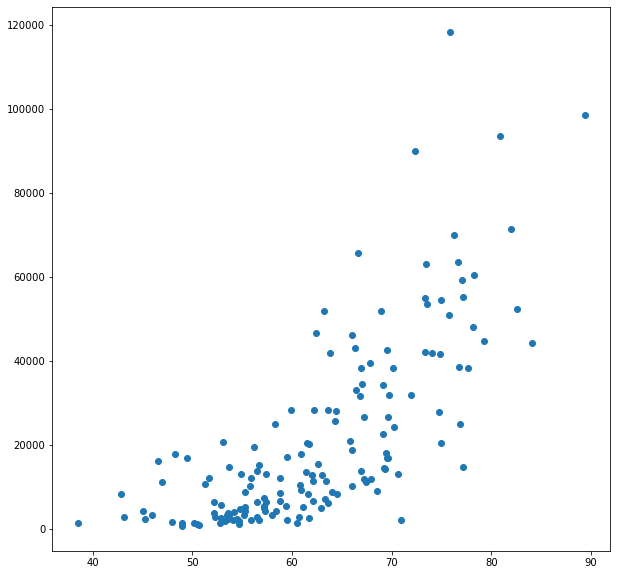

In [219]:
fig, ax = plt.subplots(figsize=(10, 10))
scatter = ax.scatter(x=merged_data.Score,
                    y=merged_data.Value)

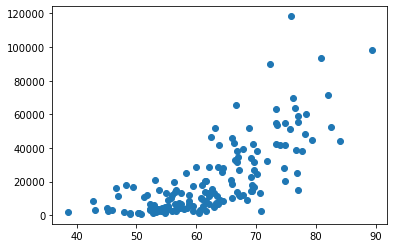

In [209]:
plt.scatter(merged_data.Score, merged_data.Value)

What that did was take the two data points (GDP and index) for each country and plot a dot at its intersection point. The higher a country’s index score, the further along to the right it’s dot will appear. And the higher its per capita GDP, the higher up the y-axis it’ll be.

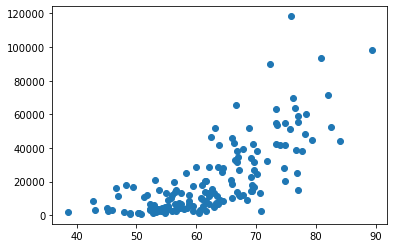

In [210]:
# A second code snippet that'll generate the exact same output
x = merged_data.Score
y = merged_data.Value
plt.scatter(x,y)

### Adding “Hover” Visibility

Let's try visualizing anomalies in our data and better understanding the data as a whole

In [211]:
import plotly.graph_objs as go
import plotly.express as px

In [221]:
fig = px.scatter(merged_data, x="Score", y="Value", log_x=True,
                hover_data=["Country", "Score"])
fig.show()

That’s an important functionality, particularly when it comes to quickly identifying statistical outliers like Luxembourg.

### Adding a Regression Line
There’s one more important piece of information that’ll improve how we understand our data: its R-squared value.

In [ ]:
def fit_line(x, y):

    x = x.to_numpy() # convert into numpy arrays
    y = y.to_numpy() # convert into numpy arrays

    A = np.vstack([x, np.ones(len(x))]).T 
    m, c = np.linalg.lstsq(A, y, rcond=None)[0]

    return m, c
    
fig = px.scatter(merged_data, x="Score", y="Value",
                 log_x=True,
                 hover_data=["Country", "Score"])
# fit a linear model 
m, c = fit_line(x = merged_data.Score, 
                y = merged_data.Value)

# add the linear fit on top
fig.add_trace(
    go.Scatter(
        x=merged_data.Score,
        y=m*merged_data.Score + c,
        mode="lines",
        line=go.scatter.Line(color="red"),
        showlegend=False)
)

fig.show()


# Preferred Approach

Just add a trendline argument to the code we've already been using.

In [213]:
fig = px.scatter(merged_data, x="Score", y="Value", trendline="ols", 
                 log_x=True, hover_data=["Country", "Score"])

fig.show()